In [1]:
# Computation
import numpy as np
from math import pi, log, sqrt

# Visualization
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pyspark
import findspark as fs
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define data paths
DR2_path = "/data/astronomy-big-data/bc96e9620e41b9aba98292d37b5eec24/LoTSS_DR2/"
mosaic_path = "/data/astronomy-big-data/bc96e9620e41b9aba98292d37b5eec24/LoTSS_DR2_mosaic/"
writeable = "/data/astronomy-big-data/bc96e9620e41b9aba98292d37b5eec24/LoTSS_DR2_writable/"

# Filter out nans

In [4]:
header = ["label", "total_pixels", "x_pixels", "y_pixels",
          "integrated_intensity", "brightest_pixel", "brightest_pixel_x", "brightest_pixel_y",
          "brightest_pixel_RA", "brightest_pixel_DEC", "center_of_mass_x", "center_of_mass_y",
          "center_of_mass_RA", "center_of_mass_DEC", "center_of_gaus_fit_x", "center_of_gaus_fit_y",
          "center_of_gaus_fit_RA", "center_of_gaus_fit_DEC", "fit_x_axis", "fit_y_axis", "fit_theta",
          "deconv_x", "deconv_y", "integrated_intensity_fit", "ratio_residual"
         ]
catalogue = pd.read_csv(writeable + "catalogue_v4/part-00000", sep=",", names=header)

# Filter nans
rows = len(catalogue)
nan_rows = catalogue[catalogue.isnull().any(axis=1)]
ratio_nan = len(nan_rows) / rows
print('{0:.2f}% nan rows'.format(ratio_nan * 100))

# Show new catalogue
catalogue = catalogue[~catalogue.index.isin(nan_rows.index)].reindex()
catalogue

0.15% nan rows


,label,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,...,center_of_gaus_fit_y,center_of_gaus_fit_RA,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual
0,P191+55_0,43,7,7,0.961113,0.001262,13,4195,194.549648,54.808582,...,4195.168076,194.549824,54.808648,1.719762,1.896624,-0.532125,0.632697,1.986707,0.971715,0.020838
1,P191+55_1,20,5,7,0.326739,0.000757,27,4605,194.552204,54.979509,...,4603.736197,194.550798,54.979016,1.519696,1.080088,0.057949,0.000000,0.000000,0.330021,0.193748
2,P191+55_2,45,7,8,0.745168,0.000793,32,3745,194.522178,54.621587,...,3745.225610,194.522008,54.621685,2.200384,1.810055,-0.030495,3.293634,1.472301,0.761027,0.051990
3,P191+55_3,43,7,10,0.702810,0.000809,33,3775,194.522370,54.634094,...,3775.203413,194.522306,54.634180,2.116900,1.720535,-1.515302,2.974798,0.644257,0.705155,0.082425
4,P191+55_4,74,9,14,1.104583,0.000829,35,4346,194.538393,54.871832,...,4346.681491,194.539006,54.872101,3.113855,2.061816,-0.772094,6.145450,2.751914,1.080356,0.161090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2291390,P146+42_10083,17,7,5,0.166614,0.000318,8650,4020,143.976115,41.881652,...,4023.000000,143.977641,41.882935,1.245998,2.115265,-0.507302,0.000000,2.968342,0.161941,0.243822
2291391,P146+42_10084,18,5,7,0.166480,0.000262,8655,4627,143.963688,42.134409,...,4624.123749,143.961873,42.133172,1.197801,7.000000,3.560527,0.000000,15.991050,0.162900,0.217834
2291392,P146+42_10085,29,5,9,0.304286,0.000400,8661,4146,143.967967,41.934002,...,4146.098797,143.967899,41.934041,1.416053,3.775077,-2.132145,0.000000,7.938858,0.311328,0.168797
2291393,P146+42_10086,72,8,11,1.478868,0.001360,8664,4607,143.958951,42.125972,...,4604.769350,143.957995,42.125023,2.369088,2.020989,3.683559,3.888796,2.578510,1.466236,0.068288


In [5]:
catalogue['mosaic'], catalogue['object'] = catalogue['label'].str.split('_', 1).str
catalogue.head()

,label,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,...,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual,mosaic,object
0,P191+55_0,43,7,7,0.961113,0.001262,13,4195,194.549648,54.808582,...,54.808648,1.719762,1.896624,-0.532125,0.632697,1.986707,0.971715,0.020838,P191+55,0
1,P191+55_1,20,5,7,0.326739,0.000757,27,4605,194.552204,54.979509,...,54.979016,1.519696,1.080088,0.057949,0.000000,0.000000,0.330021,0.193748,P191+55,1
2,P191+55_2,45,7,8,0.745168,0.000793,32,3745,194.522178,54.621587,...,54.621685,2.200384,1.810055,-0.030495,3.293634,1.472301,0.761027,0.051990,P191+55,2
3,P191+55_3,43,7,10,0.702810,0.000809,33,3775,194.522370,54.634094,...,54.634180,2.116900,1.720535,-1.515302,2.974798,0.644257,0.705155,0.082425,P191+55,3
4,P191+55_4,74,9,14,1.104583,0.000829,35,4346,194.538393,54.871832,...,54.872101,3.113855,2.061816,-0.772094,6.145450,2.751914,1.080356,0.161090,P191+55,4


In [6]:
l, c = np.unique(catalogue['mosaic'], return_counts=True)
p = c.argsort()

labels = l[p]
counts = c[p]

4

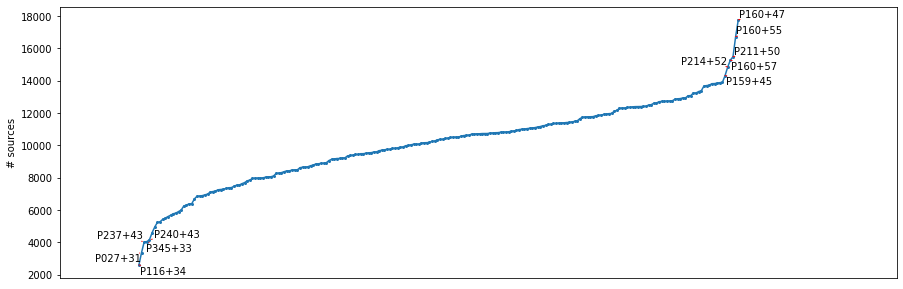

In [7]:
plt.figure(figsize=(15,5))
sns.lineplot(labels, counts, sort=False)
plt.scatter(labels, counts, s=4)
plt.xticks(np.arange(-30, len(labels)+60))
plt.xticks([])
plt.ylabel('# sources')

texts = [plt.text(i, counts[i], txt, ha='center', va='center') for i, txt in enumerate(labels) if i < 5 or i > 221]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='red'))

In [8]:
df = pd.DataFrame(counts, columns=["counts"])
df.index = labels
df.T

,P116+34,P027+31,P237+43,P345+33,P240+43,P037+39,P006+36,P022+34,P347+26,P121+32,...,P184+42,P163+42,P210+52,P155+57,P159+45,P214+52,P160+57,P211+50,P160+55,P160+47
counts,2600,3367,4024,4041,4160,4597,4949,5230,5270,5418,...,13812,13845,13868,13892,14310,14838,15264,15472,16718,17753


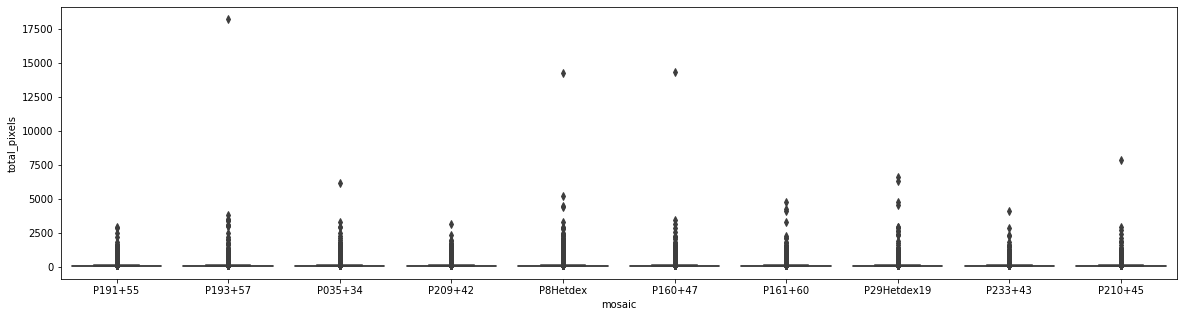

In [16]:
plt.figure(figsize=(20, 5))
sns.boxplot(x="mosaic", y="total_pixels", data=catalogue.loc[:, ["mosaic", "total_pixels"]].iloc[:100000])

In [24]:
catalogue.loc[catalogue.where(catalogue["mosaic"].isin(["P191+55"])).index, ["mosaic", "total_pixels"]]

,mosaic,total_pixels
0,P191+55,43
1,P191+55,20
2,P191+55,45
3,P191+55,43
4,P191+55,74
...,...,...
2291390,P146+42,17
2291391,P146+42,18
2291392,P146+42,29
2291393,P146+42,72


In [29]:
catalogue.loc[catalogue['mosaic'].isin(["P191+55"]), ["mosaic", "total_pixels"]]

,mosaic,total_pixels
0,P191+55,43
1,P191+55,20
2,P191+55,45
3,P191+55,43
4,P191+55,74
...,...,...
10604,P191+55,20
10605,P191+55,62
10606,P191+55,30
10607,P191+55,20


(array([2.287603e+06, 4.700000e+01, 2.500000e+01, 1.300000e+01,
        3.000000e+00, 3.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

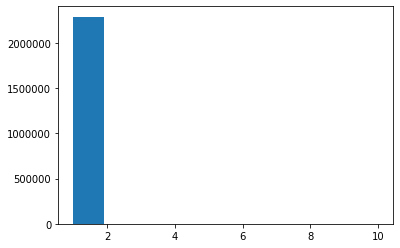

In [17]:
plt.hist(np.unique(catalogue.loc[:, "brightest_pixel_RA"], return_counts=True)[1])

(array([2.286282e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 7.960000e+02]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

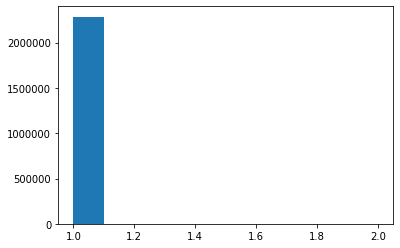

In [18]:
plt.hist(np.unique(catalogue.loc[:, "brightest_pixel_DEC"], return_counts=True)[1])

In [38]:
catalogue[catalogue["mosaic"].isin(["P000+38", "P004+38"])].sort_values(by="total_pixels", ascending=False).head(15)

,label,total_pixels,x_pixels,y_pixels,integrated_intensity,brightest_pixel,brightest_pixel_x,brightest_pixel_y,brightest_pixel_RA,brightest_pixel_DEC,...,center_of_gaus_fit_DEC,fit_x_axis,fit_y_axis,fit_theta,deconv_x,deconv_y,integrated_intensity_fit,ratio_residual,mosaic,object
2142594,P000+38_1360,4391,73,112,135.700972,0.002897,2571,6261,2.188550,39.030046,...,39.021187,42.828364,11.959631,-0.430001,100.773735,27.877269,137.861889,0.213882,P000+38,1360
944427,P004+38_2910,4099,114,97,495.622433,0.160264,5148,8841,4.061097,40.178339,...,40.179255,1.822501,2.493480,0.932742,1.555110,4.298467,181.486111,0.643416,P004+38,2910
2144468,P000+38_3234,3866,113,92,492.990406,0.163936,5274,2732,0.742792,37.565900,...,37.567689,1.804263,2.472995,0.890222,1.432335,4.232335,181.203872,0.642207,P000+38,3234
944990,P004+38_3473,2717,82,54,76.514252,0.001557,5878,5858,3.673496,38.933913,...,38.944802,11.080499,32.074432,-0.245024,25.784159,75.423521,78.323197,0.182334,P004+38,3473
942013,P004+38_496,2389,48,77,81.791455,0.005118,1565,4158,5.966783,38.214483,...,38.221627,25.432059,11.376395,0.336533,59.754189,26.489054,83.016271,0.273070,P004+38,496
2142767,P000+38_1533,2089,61,58,99.881201,0.009117,2794,8940,2.087154,40.147635,...,40.148222,8.790019,16.581580,2.390361,20.308742,38.841214,98.432133,0.216113,P000+38,1533
945159,P004+38_3642,1902,126,79,407.405431,0.254279,6092,278,3.580395,36.608015,...,36.616285,1.993470,2.388044,0.505514,2.456847,3.952566,299.418627,0.295346,P004+38,3642
2143923,P000+38_2689,1832,46,66,263.353120,0.023105,4403,9499,1.210941,40.385773,...,40.387935,18.539063,9.188139,-0.224912,43.472520,21.263452,254.814769,0.433883,P000+38,2689
2146751,P000+38_5517,1741,54,56,574.599340,0.100192,8848,6787,358.814874,39.236608,...,39.234741,4.382080,3.021293,-4.845651,9.512201,5.883669,311.506706,0.530815,P000+38,5517
946682,P004+38_5165,1720,58,69,104.303682,0.025291,7998,4861,2.547885,38.507544,...,38.491719,6.126238,8.726223,5.596184,13.860552,20.155606,65.136012,0.490494,P004+38,5165
